# CSCI 5622: Machine Learning
## Fall 2023
### Instructor: Daniel Acuna, Associate Professor, Department of Computer Science, University of Colorado at Boulder

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [2]:
NAME = "Luna McBride"
COLLABORATORS = ""

---

# Homework 4 (80 pts)

For this homework, we will use the following dataset:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%matplotlib inline

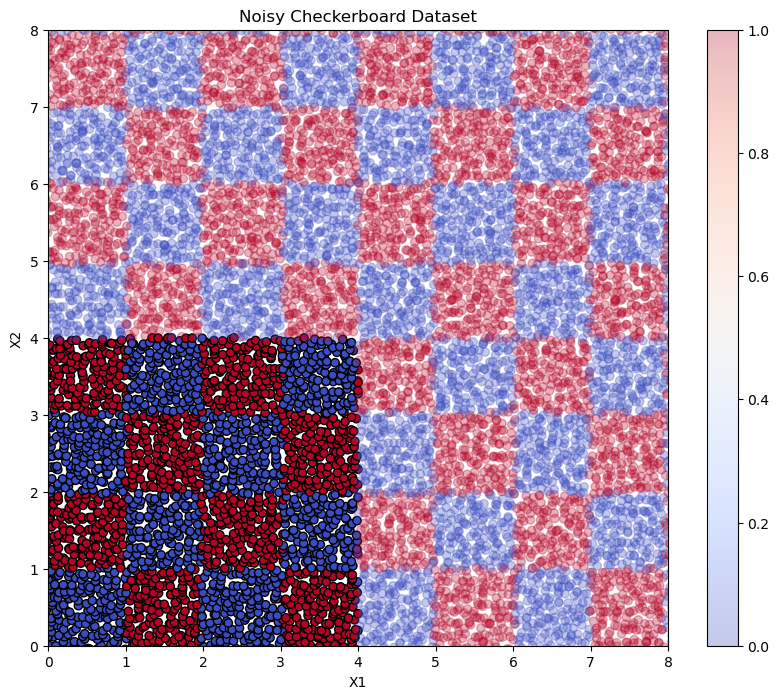

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def generate_checkerboard(n, noise=0.1):
    # Generate a checkerboard pattern
    x, y = np.meshgrid(np.linspace(0, 8, n), np.linspace(0, 8, n))
    z = (x.astype(int) + y.astype(int)) % 2
    
    # Add some noise
    noise_x = (np.random.rand(n, n) - 0.5) * noise
    noise_y = (np.random.rand(n, n) - 0.5) * noise
    x += noise_x
    y += noise_y
    
    # Flatten and stack
    data = np.vstack([x.ravel(), y.ravel()]).T
    labels = z.ravel()
    
    # Split data into training and testing
    mask = (data[:, 0] <= 4) & (data[:, 1] <= 4)
    train_data = data[mask]
    train_labels = labels[mask]
    test_data = data[~mask]
    test_labels = labels[~mask]
    
    return train_data, train_labels, test_data, test_labels

# Generate the data
train_data, train_labels, test_data, test_labels = generate_checkerboard(100)

# Splitting the training data further into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_data, train_labels, test_size=0.2, random_state=42, shuffle=True)

# Plotting the data to visualize
plt.figure(figsize=(10, 8))
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, cmap="coolwarm", edgecolors='k')
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, cmap="coolwarm", alpha=0.3)
plt.title("Noisy Checkerboard Dataset")
plt.colorbar()
plt.xlabel("X1")
plt.ylabel("X2")
plt.xlim(0, 8)
plt.ylim(0, 8)
plt.show()

### Question 1 [10 points]:

The provided code generates a noisy checkerboard dataset that represents a chess board, with coordinates $x1$ and $x2$ ranging from 0 to 8. The dataset is split into training data (from 0 to 4 for both $x1$ and $x2$) and testing data.

Your task is to:

1. Implement a Linear Support Vector Machine (SVM) classifier using scikit-learn.
2. Train the classifier on the training data.
3. Predict the labels for the testing data.
4. Calculate and report the accuracy of the classifier on the testing data.

In [5]:
# 5 pts
# Implementing the SVM Classifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# YOUR CODE HERE
clf = SVC() #Initialize the classifier
clf.fit(X_train, y_train) #Fit the classifier to the training data
pred = clf.predict(test_data) #Get predictions
accuracy = accuracy_score(test_labels, pred) #Get the accuracy from the test labels and predictions
print(f"The accuracy is {round(accuracy*100,2)}%") #Take a look at the accuracy

The accuracy is 46.34%


**Q1.2 (5 pts)** Is the accuracy low or high? Why?

The accuracy is low due to the format of the chess board. It is not linearly separable, so a linear model is not going to do much here. This is a case similar to XOR, which also could not be separated linearly without extra dimension shifting.

## Question 2 [10 points]:

Using the Linear Support Vector Machine (SVM) classifier you implemented in Question 1, visualize the support vectors of the classifier on top of the training and testing data. Draw the support vectors with a green circle.

In [6]:
n = 100 #Set the number to that of the one above
noise = 0.1 #Set the noise to that of the function above
x, y = np.meshgrid(np.linspace(0, 8, n), np.linspace(0, 8, n)) #Create a meshgrid
    
# Add some noise
noise_x = (np.random.rand(n, n) - 0.5) * noise
noise_y = (np.random.rand(n, n) - 0.5) * noise
x += noise_x
y += noise_y

print(y) #Print the noise

[[ 5.17279681e-04  1.65301085e-02 -3.95589681e-02 ...  2.33832956e-02
   5.17007923e-04  1.35316197e-02]
 [ 3.18136428e-02  5.48047350e-02  1.17173115e-01 ...  3.93400901e-02
   5.40293173e-02  6.67415497e-02]
 [ 1.64044017e-01  1.21725457e-01  1.97911100e-01 ...  1.96388312e-01
   1.69367764e-01  1.88811365e-01]
 ...
 [ 7.80409311e+00  7.84841865e+00  7.88328629e+00 ...  7.82238214e+00
   7.79531478e+00  7.84002818e+00]
 [ 7.90396777e+00  7.90985352e+00  7.86967870e+00 ...  7.86963440e+00
   7.92272710e+00  7.90774796e+00]
 [ 8.03305324e+00  8.00380206e+00  8.00168991e+00 ...  7.95698759e+00
   7.99550716e+00  7.98536797e+00]]


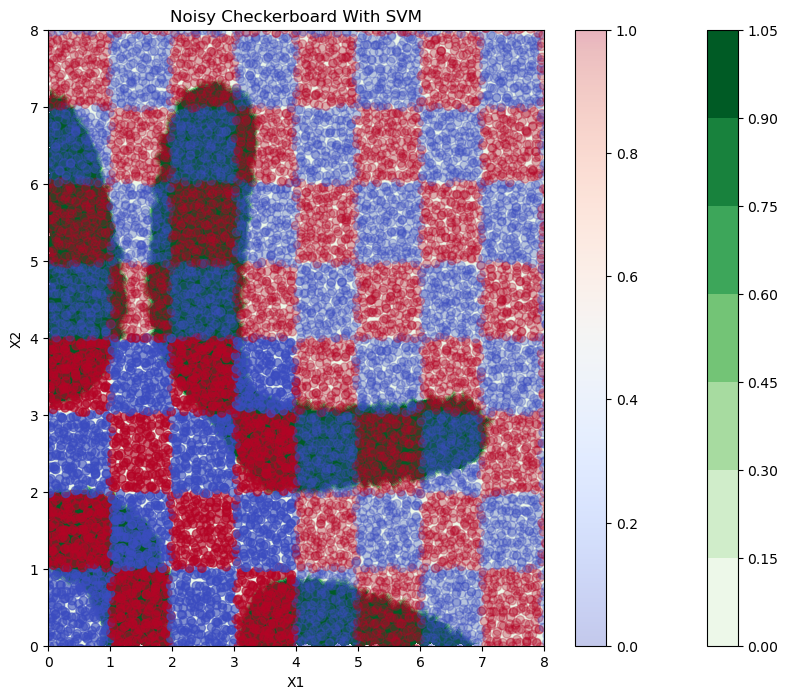

In [7]:
# 10 pts
# YOUR CODE HERE
plt.figure(figsize=(10, 8)) #Create a figure to plot on

#This next bit was pulled from Scikit-Learn's SVM plot tutorial
#https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html

all_data = train_data #Get the training data into a new variable
all_data = np.concatenate([all_data, test_data]) #Concatenate the test data

z2 = clf.predict(np.c_[x.ravel(), y.ravel()]) #Get predictions for the plot
z2 = z2.reshape(x.shape) #Reshape the predictions to fit the plot
plt.contourf(x,y, z2, cmap="Greens", alpha=1) #Create a contour to show the predictions on the plot
#Structure: mesh x, mesh y, predictions, color, visibility
plt.colorbar() #Add a colorbar to the side for the predictions

#Plot the test and train data consistent to the plot above, just lightening the train data a little so the boundaries are more clear
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, cmap="coolwarm", alpha = 0.6)
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, cmap="coolwarm", alpha=0.3)
plt.colorbar() #Add a colorbar to the side for the points
plt.title("Noisy Checkerboard With SVM") #Add the title
plt.xlabel("X1") #Set the x label to X1
plt.ylabel("X2") #Set the y label to X2
plt.xlim(0, 8) #Limit the x axis to the size of the board
plt.ylim(0, 8) #Limit the y axis to the size of the board
plt.show() #Show the plot

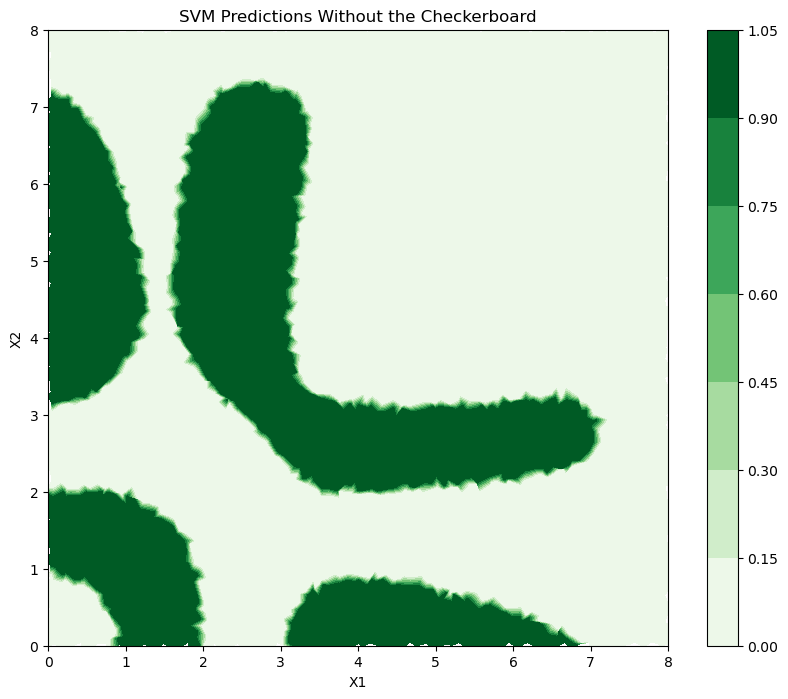

In [8]:
fig, ax = plt.subplots(figsize=(10, 8)) #Create a subplot, mostly to show the difference between plotting subplot and figure
plt.contourf(x, y, z2, cmap="Greens", alpha=1) #Add the contour predictions to a graph

plt.title("SVM Predictions Without the Checkerboard") #Add the title
plt.colorbar() #Add a colorbar to show density
plt.xlabel("X1") #Add the x1 label
plt.ylabel("X2") #Add the x2 label
plt.xlim(0, 8) #Limit the x axis to the size of the board
plt.ylim(0, 8) #Limit the y axis to the size of the board
plt.show() #Show the plot

A plot for the boundaries with and without the points was made to both play with subplots vs figure, as well as to show the decision boundaries on their own. There is some added funkiness from using all of the data instead of just the test data. This is due to the fact that the training data needed to be used to display the svm on the whole plot. The training being only in one corner really messes up how the test data should be plotted.

### Question 3 [20 points]:

The Support Vector Machine (SVM) classifier offers various kernel functions that can be used to transform the input data into higher-dimensional space. In this question, you are required to:

1. Systematically explore all the kernel functions available for the `SVC` object in scikit-learn: `'linear'`, `'poly'`, `'rbf'`, and `'sigmoid'`.
2. For each kernel, train the SVM classifier and compute its validation performance.
3. Identify and report the kernel that gives the best validation performance.
4. For the best performing model, visualize the predictions on the test dataset
5. For the best model, visualize the support vectors on the noisy checkerboard dataset.

The best performing kernel was rbf with an accuracy of 70.86%.


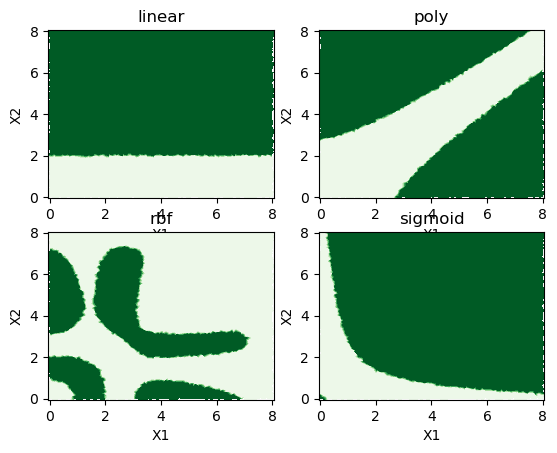

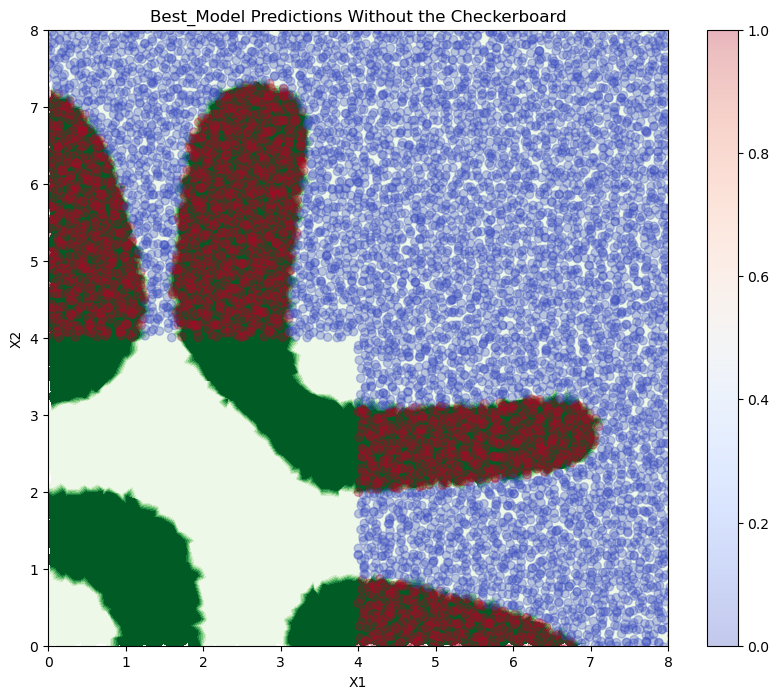

In [9]:
# 15 pts
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
best_accuracy = 0.0
best_kernel = None
best_model = None

# YOUR CODE HERE
C = 1 #Add the C parameter, as the SVCs got upset if I did not specify this while specifying the kernel
i=1 #Add an iterator for subplotting all of the models

#For each kernel, run the model and see what happens
for kernel in kernels:
    clf = SVC(kernel = kernel, C = C) #Run the svc model with the specified kernel
    clf.fit(X_train, y_train) #Fit the model
    pred = clf.predict(X_val) #Predict based on the validation data
    accuracy = accuracy_score(y_val, pred) #Get an accuracy score
    
    plt.subplot(2,2, i) #Create a subplot for the trial
    Z2 = clf.predict(np.c_[x.ravel(), y.ravel()]) #Get predictions for all of the data
    Z2 = Z2.reshape(x.shape) #Reshape the predictions to fit the plot
    plt.contourf(x,y, Z2, cmap="Greens", alpha=1) #Add the contour predictions to a graph
    plt.title(kernel) #Add the title as the model
    plt.xlabel("X1") #Add the x1 label
    plt.ylabel("X2") #Add the x2 label
    
    
    #If the accuracy is the best so far, update the best variables
    if accuracy > best_accuracy:
        best_accuracy = accuracy #Update the best accuracy to this new best
        best_kernel = kernel #Update the best kernel to the new best kernel
        best_model = clf #Update the best model to the new best model
        
    i+=1 #Update the plotting iterator
    
print(f"The best performing kernel was {best_kernel} with an accuracy of {round(best_accuracy*100,2)}%.") #Print the kernel with the best accuracy
test_pred = best_model.predict(test_data) #Predict using the best model on the test data


fig, ax = plt.subplots(figsize=(10, 8)) #Create a subplot, mostly to show the difference between plotting subplot and figure

Z2 = best_model.predict(np.c_[x.ravel(), y.ravel()]) #Get predictions for the plot
Z2 = Z2.reshape(x.shape) #Reshape the predictions to fit the plot
plt.contourf(x,y, Z2, cmap="Greens", alpha=1) #Add the contour predictions to a graph
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_pred, cmap="coolwarm", alpha=0.3) #Scatter the test data on top of the winnwe


plt.title("Best_Model Predictions Without the Checkerboard") #Add the title
plt.colorbar() #Add a colorbar to show density
plt.xlabel("X1") #Add the x1 label
plt.ylabel("X2") #Add the x2 label
plt.xlim(0, 8) #Limit the x axis to the size of the board
plt.ylim(0, 8) #Limit the y axis to the size of the board
plt.show() #Show the plot

**Q3.2 (5 pts)** Why does the testing prediction have the shape that it does? how does it related to the kernel used?

The test predictions hardly fit the data at all. None of these know how to handle the grid structure to the point where I thought I was plotting these wrong until I printed out all of the plots. I will note that I utilized regenerated data rather than the original. It was either do that or use the original data, which created remnants in places where the training data was already used. The remnants created by using the training data again is an interesting thing to note in itself, as the models clearly do not know how to handle the grid pattern even considering the fact that they had that data in front of them. These remnants did also have an effect on predictions made outside of the training set however, hence why I did not use the original data in the end. This comes with a trade-off of a newly randomized noise seed, but it is likely for the best.

The shape itself comes from the specific kernels used. The linear kernel tried to cut the data with lines, but failed due to only being able to cut so many. The polynomial kernel had a similar problem, but was able to use less linearity in its cuts. Too bad for it that the grid was covered in straight lines, so the extra degrees of freedom did almost nothing here. The sigmoid was interesting in how it only either hug or avoid the far left corner. This is likely following its perpensity to have higher activation for lower values before tapering off, but while also flip-flopping which of the values it is considering to use for that pattern. 

This puts RBF as the winner, as it was able to use neighborhood calculations to at least map out some of the squares. Even this could only go so far, however, as the boxes of the grid are isolated from one another. It squeaked out a 72% accuracy, which is not that good considering that a single color could be predicted and still obtain 50% accuracy. This goes to show how the SVMs are not the best choice for this problem without additional feature engineering.

I have added a loop using the original data just to show this off:

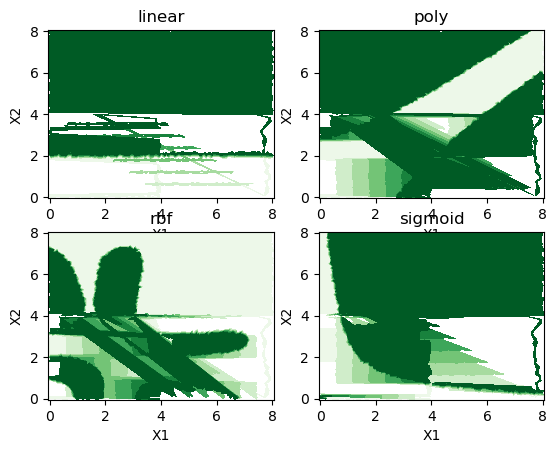

In [10]:
i=1 #Reset the iterator 

#For each kernel, run it and show what happens
for kernel in kernels:
    clf = SVC(kernel = kernel, C = C) #Run the svc model with the specified kernel
    clf.fit(X_train, y_train) #Fit the model
    pred = clf.predict(X_val) #Predict based on the validation data
    accuracy = accuracy_score(y_val, pred) #Get an accuracy score
    
    plt.subplot(2,2, i) #Create a subplot for the trial
    Z2 = clf.predict(all_data) #Get predictions for all of the data
    Z2 = Z2.reshape(x.shape) #Reshape the predictions to fit the plot
    plt.contourf(all_data[:,0].reshape(100,100), all_data[:,1].reshape(100,100), Z2, cmap="Greens", alpha=1) #Add the contour predictions to a graph
    plt.title(kernel) #Add the title as the model
    plt.xlabel("X1") #Add the x1 label
    plt.ylabel("X2") #Add the x2 label
        
    i+=1 #Update the plotting iterator
    
plt.show() #Show the plots

### Question 4 [15 points]:

Feature engineering plays a crucial role in enhancing the performance of machine learning models, especially for complex patterns like the noisy checkerboard dataset. Your task is to devise a feature transformation that makes the checkerboard problem linearly separable for a Logistic Regression model.

**Hint**: Reflect on the periodic nature of the checkerboard pattern. Can you utilize trigonometric functions, specifically the sine function, to create a new feature or transform the existing features in such a way that the problem becomes linearly separable? **You should expect to achieve more than 90% accuracy on validation.**

Implement a function named `transform_features`.

```python
def transform_features(data: np.ndarray) -> np.ndarray:
    """
    Transforms the original data to capture the periodic nature of the checkerboard pattern.
    
    Parameters:
    - data (np.ndarray): A 2D numpy array where each row is a data point and each column is a feature (x1 and x2).
    
    Returns:
    - np.ndarray: A 2D numpy array containing the transformed data.
    """
    pass
```

After implementing the function:

1. Apply the `transform_features` function to the training data.
2. Train a Logistic Regression model on the transformed data.
3. Report the accuracy on the validation set.

In [11]:
from sklearn.linear_model import LogisticRegression

# YOUR CODE HERE
#Transform_Features: transform a features array into one to better suit the logistic regression
#Input: The Data Array
#Output: The Transformed Data Array
def transform_features(data):
    #Dataset structure: x1, x2 representing a grid
    #Math intuition: sine flips negative at pi and back positive at 2pi, continuing this flip forever.
    #The board flips classification for all odd numbers in a similar pattern along both axes
    #Thus, using a sin on both multiplying by pi will fit this intuition. Multiplying the two together
    #then uses negative vs positive to align with model decisions.
    lambda_data = lambda x1, x2: np.sin(x1*np.pi) * np.sin(x2*np.pi) #A lambda function to calculate the sine intuition listed
    transformed_data = lambda_data(data[:, 0], data[:, 1]) #Apply the lambda function to get the transformed data
    return transformed_data.reshape(len(data),1) #Return the transformed data, reshaping to x,1 to fit the requred structure in the tests

t = transform_features(X_train) #Get the transformed features on X_train

clf = LogisticRegression() #Initialize a logistic regression
clf.fit(t, y_train) #Fit the regression on the transformed data
pred = clf.predict(transform_features(X_val)) #Get predictions on the validation set to test accuracy

accuracy = accuracy_score(y_val, pred) #Get the accuracy based on the predictions
print(f"Logistic Regression accuracy comes to {round(accuracy*100,2)}%.") #Print the accuracy

Logistic Regression accuracy comes to 95.21%.


In [12]:
# 15 points
# Test 1: Check the return type
assert isinstance(transform_features(X_train), np.ndarray), "The function should return a numpy ndarray."

# Test 2: Check the shape of the returned data
assert transform_features(X_train).shape[0] == X_train.shape[0], "The number of rows in the transformed data should match the original data."
assert transform_features(X_train).shape[1] == 1, "The function should return a transformed data with only one feature."

# Test 3: Check for non-constant values (i.e., the transformation isn't just returning zeros or a constant)
unique_values = np.unique(transform_features(X_train))
assert len(unique_values) > 1, "The transformed data should have more than one unique value."


### Question 5 [20 points]:

Neural networks, especially multi-layer perceptrons (MLPs), have the ability to automatically learn features from data, making them powerful tools for complex patterns like the noisy checkerboard dataset. In this question, you'll explore this capability.

Your tasks are:

1. Implement and train three different MLP architectures to classify the checkerboard pattern:
   - An MLP with 1 hidden layer.
   - An MLP with 2 hidden layers.
   - An MLP with 3 hidden layers.
   
   For each hidden layer, you can use no more than 10 neurons. Feel free to experiment with different numbers of neurons within this limit for each layer. Make sure to set the maximum number of iterations to at least 3000 (parameter `max_iter`)

2. For each of the three architectures, compute its performance on the validation set.

3. Identify the best-performing model among the three based on validation performance.

4. Visualize the predictions of the best-performing model on the test dataset. You should use a scatter plot where the colors of the points represent the predicted classes.

**Note**: Ensure that the input features to the neural network are the original $ x1 $ and $x2 $ without any manual feature engineering.

The best model is the 3-layer MLP with an accuracy of 79.64%.
Test Accuracy came to 51.83%


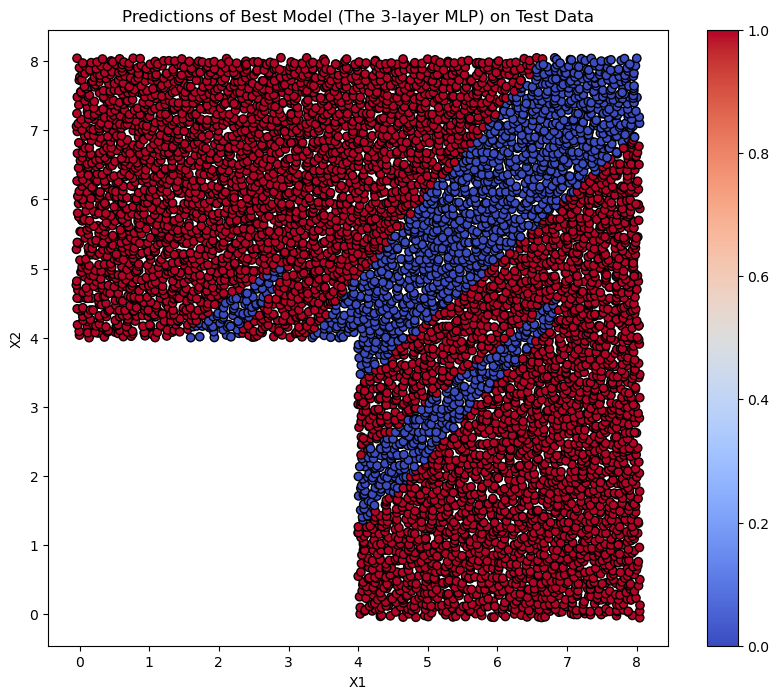

In [13]:
# 15 pts
from sklearn.neural_network import MLPClassifier

# YOUR CODE HERE
mlp1 = MLPClassifier([10], max_iter = 3000) #Create the 1-layer mlp
mlp2 = MLPClassifier([10, 10], max_iter = 3000) #Create the 2-layer mlp
mlp3 = MLPClassifier([10, 10, 10], alpha = 0.001, epsilon = 1.2e-8, max_iter = 3000) #Create the 3-layer mlp
#These are some alpha and epsilon values that I played with and turned out interesting. With this, the 3-layer comes
#to accuracies above 0.8 more often than not

models = [mlp1, mlp2, mlp3] #Put these models into a list

best_model = None #Create a variable to hold the best model
best_mlp = 0 #Create a variable to hole the best mlp layer count
best_accuracy = 0 #Create a variable to hold the best accuracy

iterator = 1 #Create an iterator to put into best_mlp

#For each models, test if it is the best
for model in models:
    model.fit(X_train, y_train) #Fit the model on the training data
    pred = model.predict(X_val) #Get predictions from the validation data
    accuracy = accuracy_score(y_val, pred) #Get the accuracy using the predictions and validation labels
    
    #If this is the best accuracy, set it as such
    if accuracy > best_accuracy:
        best_accuracy = accuracy #Update the best accuracy to the current accuracy
        best_model = model #Update the best model to the current model
        best_mlp = iterator #Update the best mlp to the iterator
        
    iterator += 1 #Update the iterator based on which mlp model it is
    
print(f"The best model is the {best_mlp}-layer MLP with an accuracy of {round(best_accuracy*100,2)}%.") #Print the best model
best_architecture = f"The {best_mlp}-layer MLP" #Set the best architecture to the best mlp

# 4. Visualize the predictions of the best-performing model on the test dataset
y_test_pred = best_model.predict(test_data)
test_accuracy = accuracy_score(test_labels, y_test_pred)
print(f"Test Accuracy came to {round(test_accuracy*100,2)}%")
plt.figure(figsize=(10, 8))
plt.scatter(test_data[:, 0], test_data[:, 1], c=y_test_pred, cmap="coolwarm", edgecolors='k')
plt.title(f"Predictions of Best Model ({best_architecture}) on Test Data")
plt.xlabel("X1")
plt.ylabel("X2")
plt.colorbar()
plt.show()

These models appear to have flexibility in segmenting their data, but tend to radiate from the center rather than being able to split the values into the checkerboard pattern. 

**Q5.1 (5 pts)** Plot the learning curve of the best model using its `loss_curve_` attribute

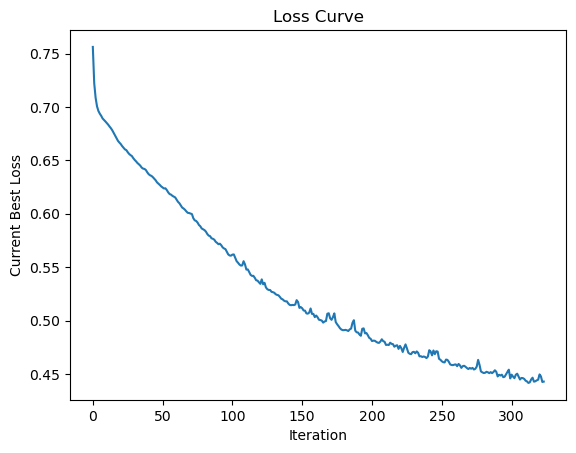

In [14]:
# YOUR CODE HERE
plt.plot(best_model.loss_curve_) #Plot the loss curve
plt.title("Loss Curve") #Add the loss curve title to the graph
plt.xlabel("Iteration") #Add the xlabel to show the iterations
plt.ylabel("Current Best Loss") #Add the y label to show the best loss
plt.show() #Show the plot